# Модели ML

In [1]:
import pandas as pd
import numpy as np

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [138]:
df = pd.read_csv('../0_data/expanded_data_with_OSM_v3.csv', sep = ',')
df_target = pd.read_csv('../0_data/train.csv', sep = ',')
df = df.merge(df_target[['id', 'target']], how='left', on='id')

In [143]:
df.describe()

,Unnamed: 0,id,atm_group,lat,lng,distance_to_fast_food,distance_to_clothes,distance_to_vending_parking,distance_to_cafe,distance_to_pharmacy,...,salary,population_density,happy_index,target_x,avgC,avgR,avgS,avgA,capital,target_y
count,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5467.000000,5454.000000,1403.000000,5739.000000,5735.000000,...,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000,5957.000000
mean,2978.000000,4432.957277,4416.499580,54.160017,63.519692,974.710836,1141.118479,3200.808718,802.307280,595.190971,...,48177.347490,26.990442,80.831459,0.000735,0.000735,0.000735,0.000735,0.000735,0.120195,0.000735
std,1719.782108,2547.059400,2444.317377,4.346200,33.020176,1479.428526,1571.858222,2959.691942,1248.727825,1015.905122,...,8381.451295,24.027636,2.918031,0.086220,0.045815,0.017085,0.031926,0.070497,0.325216,0.086220
min,0.000000,5.000000,32.000000,42.057080,19.941530,0.000000,0.000000,21.102462,0.000000,0.000000,...,24399.000000,1.168499,76.000000,-0.145001,-0.145001,-0.025588,-0.081613,-0.088685,0.000000,-0.145001
25%,1489.000000,2249.000000,1942.000000,52.248916,37.858986,161.540694,192.651479,552.684639,155.297936,124.101037,...,42845.000000,3.778890,80.000000,-0.061486,-0.025645,-0.016940,-0.022416,-0.034377,0.000000,-0.061486
50%,2978.000000,4401.000000,5478.000000,55.069638,48.578510,451.854329,553.612139,2189.662796,382.702926,286.370488,...,44500.000000,28.034260,80.000000,-0.015589,-0.006291,0.002931,-0.004482,-0.034377,0.000000,-0.015589
75%,4467.000000,6677.000000,5478.000000,56.122756,84.951080,1159.617096,1361.846636,5458.496492,901.285697,628.383672,...,60000.000000,60.367053,84.000000,0.040243,0.032903,0.005491,0.034486,0.003110,0.000000,0.040243
max,5956.000000,8811.000000,8083.000000,69.491912,173.706490,9978.406084,9936.217504,9931.143303,9916.390589,9894.513910,...,60000.000000,60.367053,86.000000,0.218608,0.218043,0.031983,0.099002,0.151132,1.000000,0.218608


In [144]:
df.isnull().sum().head(56)

Unnamed: 0                            0
id                                    0
atm_group                             0
address                               0
address_rus                           0
lat                                   0
lng                                   0
test_train_flag                       0
geometry                              0
distance_to_fast_food               490
distance_to_clothes                 503
distance_to_vending_parking        4554
distance_to_cafe                    218
distance_to_pharmacy                222
distance_to_atm                     334
distance_to_cinema                 1182
distance_to_shoe_shop               817
distance_to_bank                    155
distance_to_supermarket             222
distance_to_restaurant              571
distance_to_mobile_phone_shop       167
distance_to_convenience             144
distance_to_vending_any            2066
distance_to_sber_bank               549
distance_to_vtb_bank               1422


In [145]:
df.regions.value_counts()

regions
Central Federal District            1687
Siberian Federal District           1169
Volga Federal District              1095
Far Eastern Federal District         814
Northwestern Federal District        430
Southern Federal District            363
Ural Federal District                336
North Caucasian Federal District      63
Name: count, dtype: int64

### Заполняем пропуски максимальными значениями

In [146]:
#замения пропуски максимальными значениями расстояний
df = df.fillna(df.max())

In [147]:
len(df)

5957

OneHotEncoding для категориальных фичей

In [17]:
df = df[df['test_train_flag'] == 'train']
df['capital'] = np.where((df['cities'] == 'Moscow') | (df['cities'] == 'Saint Petersburg'), 1, 0)

In [55]:
df.drop(['Unnamed: 0','id','address','address_rus','lat','lng','test_train_flag','geometry','cnt_apart_200m','cnt_banks_200m','cnt_atm_200m'], axis =1,  inplace = True)

In [19]:
df = df.merge(df.groupby('cities').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgC'}),
         how='left', on='cities')

df = df.merge(df.groupby('regions').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgR'}),
         how='left', on='regions')

df = df.merge(df.groupby('states').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgS'}),
         how='left', on='states')

df = df.merge(df.groupby('atm_group').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgA'}),
         how='left', on='atm_group')

In [20]:
df['atm_group'] = df['atm_group'].astype(int)
df = pd.get_dummies(df, columns=['atm_group'], drop_first=True) 
df.drop(columns=['cities'], inplace=True)
X = pd.get_dummies(df, drop_first=True) 

y = X['target']
X = X.loc[:, X.columns != 'target'].reset_index(drop=True)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 55 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   distance_to_fast_food            5957 non-null   float64
 1   distance_to_clothes              5957 non-null   float64
 2   distance_to_vending_parking      5957 non-null   float64
 3   distance_to_cafe                 5957 non-null   float64
 4   distance_to_pharmacy             5957 non-null   float64
 5   distance_to_atm                  5957 non-null   float64
 6   distance_to_cinema               5957 non-null   float64
 7   distance_to_shoe_shop            5957 non-null   float64
 8   distance_to_bank                 5957 non-null   float64
 9   distance_to_supermarket          5957 non-null   float64
 10  distance_to_restaurant           5957 non-null   float64
 11  distance_to_mobile_phone_shop    5957 non-null   float64
 12  distance_to_convenie

## Модели

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, ElasticNet
from sklearn.metrics import r2_score, mean_squared_error as MSE, mean_absolute_percentage_error as MAPE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif, chi2, mutual_info_regression, f_regression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

### Разбиваем на train и test

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

### Стандартизация признаков

In [25]:
normalizer = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_train)
X_train = pd.DataFrame(data=X_real_norm_np)

normalizer = StandardScaler()
X_real_norm_np = normalizer.fit_transform(X_test)
X_test = pd.DataFrame(data=X_real_norm_np)

### Linear Regression

In [26]:
lr = LinearRegression()

lr.fit(X_train, y_train)

lr_train = lr.predict(X_train)
lr_test = lr.predict(X_test)

lr_r2_train = r2_score(y_train, lr_train)
lr_mse_train = MSE(y_train, lr_train)
lr_rmse_train = MSE(y_train, lr_train, squared=False)
# lr_mape_train = MAPE(y_train, lr_train)

lr_r2_test = r2_score(y_test, lr_test)
lr_mse_test = MSE(y_test, lr_test)
lr_rmse_test = MSE(y_test, lr_test, squared=False)
# lr_mape_test = MAPE(y_test, lr_test)

print(f"TRAIN: R2: {lr_r2_train}, MSE: {lr_mse_train}, \
RMSE: {lr_rmse_train}\n")
print(f"TEST: R2: {lr_r2_test}, MSE: {lr_mse_test }, \
RMSE: {lr_rmse_test }")


TRAIN: R2: 0.7404188678397787, MSE: 0.001913165356605396, RMSE: 0.04373974573091842

TEST: R2: -4.814081650236792e+20, MSE: 3.658928255673563e+18, RMSE: 1912832521.595543


### Ridge (L2-регуляризация)

In [27]:
ridge = Ridge()

ridge.fit(X_train, y_train)

ridge_train = ridge.predict(X_train)
ridge_test = ridge.predict(X_test)

ridge_r2_train = r2_score(y_train, ridge_train)
ridge_mse_train = MSE(y_train, ridge_train)
ridge_rmse_train = MSE(y_train, ridge_train, squared=False)
# ridge_mape_train = MAPE(y_train, ridge_train)

ridge_r2_test = r2_score(y_test, ridge_test)
ridge_mse_test = MSE(y_test, ridge_test)
ridge_rmse_test = MSE(y_test, ridge_test, squared=False)
# ridge_mape_test = MAPE(y_test, ridge_test)

print(f"TRAIN: R2: {ridge_r2_train}, MSE: {ridge_mse_train}, \
RMSE: {ridge_rmse_train}\n")
print(f"TEST: R2: {ridge_r2_test}, MSE: {ridge_mse_test}, \
RMSE: {ridge_rmse_test}")

# model.coef_

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


### ElasticNet с GridSearchCV

In [28]:
params = {'alpha': np.arange(1, 10, 1), 'l1_ratio': np.arange(0, 1.1, 0.1)}
en = GridSearchCV(ElasticNet(), param_grid=params, cv=10, n_jobs=-1)

en.fit(X_train, y_train)

en_train = en.predict(X_train)
en_test = en.predict(X_test)

en_r2_train = r2_score(y_train, en_train)
en_mse_train = MSE(y_train, en_train)
en_rmse_train = MSE(y_train, en_train, squared=False)
# en_mape_train = MAPE(y_train, en_train)

en_r2_test = r2_score(y_test, en_test)
en_mse_test = MSE(y_test, en_test)
en_rmse_test = MSE(y_test, en_test, squared=False)
# en_mape_test = MAPE(y_test, en_test)

print(f"TRAIN: R2: {en_r2_train}, MSE: {en_mse_train}, \
RMSE: {en_rmse_train}\n")
print(f"TEST: R2: {en_r2_test}, MSE: {en_mse_train}, \
RMSE: {en_rmse_test}")

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

/opt/anaconda3/lib/python3.9/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.878e+00, tolerance: 2.938e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.952e+00, tolerance: 2.993e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

TRAIN: R2: 0.6743170539101042, MSE: 0.0024003490720264833, RMSE: 0.048993357427578724

TEST: R2: 0.6633662038804814, MSE: 0.0024003490720264833, RMSE: 0.05058235884372988


/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.655e+00, tolerance: 3.292e-03 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


### Дерево решений

In [29]:
tree = DecisionTreeRegressor()

tree.fit(X_train, y_train)

tree_train = tree.predict(X_train)
tree_test = tree.predict(X_test)

tree_r2_train = r2_score(y_train, tree_train)
tree_mse_train = MSE(y_train, tree_train)
tree_rmse_train = MSE(y_train, tree_train, squared=False)
# tree_mape_train = MAPE(y_train, tree_train)

tree_r2_test = r2_score(y_test, tree_test)
tree_mse_test = MSE(y_test, tree_test)
tree_rmse_test = MSE(y_test, tree_test, squared=False)
# tree_mape_test = MAPE(y_test, tree_test)


print(f"TRAIN: R2: {tree_r2_train}, MSE: {tree_mse_train}, \
RMSE: {tree_rmse_train}\n")
print(f"TEST: R2: {tree_r2_test}, MSE: {tree_mse_test}, \
RMSE: {tree_rmse_test}")

TRAIN: R2: 0.9857963460102065, MSE: 0.00010468379779509705, RMSE: 0.010231510044714663

TEST: R2: 0.5488932781953282, MSE: 0.003428623049329045, RMSE: 0.05855444517138767


### Дерево решений с GridSearchCV

In [30]:
params = {'max_depth' : np.arange(3, 10, 1),
          'max_features' : ["auto", "sqrt", "log2"],
          'min_samples_leaf': np.arange(3, 8, 1)}

gs_tree = GridSearchCV(DecisionTreeRegressor(), params, cv=5, scoring='r2')

gs_tree.fit(X_train, y_train)

gs_tree_train = gs_tree.predict(X_train)
gs_tree_test = gs_tree.predict(X_test)

gs_tree_r2_train = r2_score(y_train, gs_tree_train)
gs_tree_mse_train = MSE(y_train, gs_tree_train)
gs_tree_rmse_train = MSE(y_train, gs_tree_train, squared=False)
# gs_tree_mape_train = MAPE(y_train, gs_tree_train)

gs_tree_r2_test = r2_score(y_test, gs_tree_test)
gs_tree_mse_test = MSE(y_test, gs_tree_test)
gs_tree_rmse_test = MSE(y_test, gs_tree_test, squared=False)
# gs_tree_mape_test = MAPE(y_test, gs_tree_test)

print(f"TRAIN: R2: {gs_tree_r2_train}, MSE: {gs_tree_mse_train}, \
RMSE: {gs_tree_rmse_train}\n")
print(f"TEST: R2: {gs_tree_r2_test}, MSE: {gs_tree_mse_test}, \
RMSE: {gs_tree_rmse_test}")

/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/opt/anaconda3/l

TRAIN: R2: 0.7379153802549976, MSE: 0.0019316165655897943, RMSE: 0.043950160017795094

TEST: R2: 0.7343835857068758, MSE: 0.0020188095550477494, RMSE: 0.04493116463044052


/opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


### Метод ближайших соседей

In [ ]:
knn = KNeighborsRegressor(n_neighbors=10) #лучший результат достигается с 10-ю соседями
knn.fit(X_train, y_train)

knn_train = knn.predict(X_train)
knn_test = knn.predict(X_test)

knn_r2_train = r2_score(y_train, knn_train)
knn_mse_train = MSE(y_train, knn_train)
knn_rmse_train = MSE(y_train, knn_train, squared=False)
# knn_mape_train = MAPE(y_train, knn_train)

knn_r2_test = r2_score(y_test, knn_test)
knn_mse_test = MSE(y_test, knn_test)
knn_rmse_test = MSE(y_test, knn_test, squared=False)
# knn_mape_test = MAPE(y_test, knn_test)

print(f"TRAIN: R2: {knn_r2_train}, MSE: {knn_mse_train}, \
RMSE: {knn_rmse_train}\n")
print(f"TEST: R2: {knn_r2_test}, MSE: {knn_mse_train}, \
RMSE: {knn_rmse_test}")


### Метод опорных векторов

In [31]:
svr = SVR()
svr.fit(X_train, y_train)

svr_train = svr.predict(X_train)
svr_test = svr.predict(X_test)

svr_r2_train = r2_score(y_train, svr_train)
svr_mse_train = MSE(y_train, svr_train)
svr_rmse_train = MSE(y_train, svr_train, squared=False)
# svr_mape_train = MAPE(y_train, svr_train)

svr_r2_test = r2_score(y_test, svr_test)
svr_mse_test = MSE(y_test, svr_test)
svr_rmse_test = MSE(y_test, svr_test, squared=False)
# svr_mape_test = MAPE(y_test, svr_test)

print(f"TRAIN: R2: {svr_r2_train}, MSE: {svr_mse_train}, \
RMSE: {svr_rmse_train}\n")
print(f"TEST: R2: {svr_r2_test}, MSE: {svr_mse_train}, \
RMSE: {svr_rmse_test}")


TRAIN: R2: 0.6174546143329123, MSE: 0.002819436732927833, RMSE: 0.05309836845824769

TEST: R2: 0.5791592437208131, MSE: 0.002819436732927833, RMSE: 0.05655605617549164


### Случайный лес

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42, n_jobs=-1, warm_start=True)

rf.fit(X_train, y_train)

rf_train = rf.predict(X_train)
rf_test = rf.predict(X_test)

rf_r2_train = r2_score(y_train, rf_train)
rf_mse_train = MSE(y_train, rf_train)
rf_rmse_train = MSE(y_train, rf_train, squared=False)
rf_mape_train = MAPE(y_train, rf_train)

rf_r2_test = r2_score(y_test, rf_test)
rf_mse_test = MSE(y_test, rf_test)
rf_rmse_test = MSE(y_test, rf_test, squared=False)
rf_mape_test = MAPE(y_test, rf_test)

print(f"TRAIN: R2: {rf_r2_train}, MSE: {rf_mse_train}, \
RMSE: {rf_rmse_train}, MAPE: {rf_mape_train}\n")
print(f"TEST: R2: {rf_r2_test}, MSE: {rf_mse_test }, \
RMSE: {rf_rmse_test }, MAPE: {rf_mape_test}")


/opt/anaconda3/lib/python3.9/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized



TRAIN: R2: 0.9584346037491727, MSE: 0.0003063453629271311, RMSE: 0.0175027244429869, MAPE: 1.071744534382079

TEST: R2: 0.778018114914973, MSE: 0.0016871666303070213, RMSE: 0.041075133965783016, MAPE: 2.4946201500509226


/opt/anaconda3/lib/python3.9/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

/opt/anaconda3/lib/python3.9/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '
Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

/opt/anaconda3/lib/python3.9/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '


In [33]:
from scipy.stats import randint

param_grid = {
               'min_samples_leaf': [1, 2, 3],
#                'max_depth': randint(30, 40),
               'max_features' : ['auto', 'sqrt'],
               'max_leaf_nodes': np.arange(2600, 5000),
             }

rf_opt = RandomizedSearchCV(estimator = RandomForestRegressor(), param_distributions = param_grid, 
                            cv = 5, n_jobs=-1, error_score='raise')

rf_opt.fit(X_train, y_train)
pred_rf_opt_train = rf_opt.predict(X_train)
pred_rf_opt = rf_opt.predict(X_test)

rf_opt_r2_train = r2_score(y_train, pred_rf_opt_train)
rf_opt_mse_train = MSE(y_train, pred_rf_opt_train)
rf_opt_rmse_train = MSE(y_train, pred_rf_opt_train, squared=False)
rf_opt_mape_train = MAPE(y_train, pred_rf_opt_train)

rf_opt_r2_test = r2_score(y_test, pred_rf_opt)
rf_opt_mse_test = MSE(y_test, pred_rf_opt)
rf_opt_rmse_test = MSE(y_test, pred_rf_opt, squared=False)
rf_opt_mape_test = MAPE(y_test, pred_rf_opt)

print(f"TRAIN: R2: {rf_opt_r2_train}, MSE: {rf_opt_mse_train}, \
RMSE: {rf_opt_rmse_train}, MAPE: {rf_opt_mape_train}\n")
print(f"TEST: R2: {rf_opt_r2_test}, MSE: {rf_opt_mse_test }, \
RMSE: {rf_opt_rmse_test }, MAPE: {rf_opt_mape_test}")


Fatal Python error: config_get_locale_encoding: failed to get the locale encoding: nl_langinfo(CODESET) failed
Python runtime state: preinitialized

/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be rem

TRAIN: R2: 0.940103856037764, MSE: 0.0004414466747608992, RMSE: 0.021010632421726367, MAPE: 1.168452055204701

TEST: R2: 0.7778076190308116, MSE: 0.0016887664979333276, RMSE: 0.041094604243541846, MAPE: 2.413839227791189


In [34]:
from sklearn.ensemble import StackingRegressor
estimators = [('rf', rf),
#               ('lr', lr),
#               ('cb', CatBoostRegressor())
             ]

stacked = StackingRegressor(estimators=estimators, cv=2, n_jobs=-1)

stacked.fit(X, y)

stacked_preds = stacked.predict(X_test)

stacked_r2_test = r2_score(y_test, stacked_preds)
stacked_mse_test = MSE(y_test, stacked_preds)
stacked_rmse_test = MSE(y_test, stacked_preds, squared=False)

print(f"TEST: R2: {stacked_r2_test}, MSE: {stacked_mse_test}, \
RMSE: {stacked_rmse_test}")

TEST: R2: 0.265738701875051, MSE: 0.005580730876520921, RMSE: 0.07470428954565407


/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/opt/anaconda3/lib/python3.9/multiprocessing/resource_tracker.py:96: UserWarning: resource_tracker: process died unexpectedly, relaunching.  Some resources might leak.
  warnings.warn('resource_tracker: process died unexpectedly, '


### Catboost

In [98]:
from catboost import CatBoostRegressor

In [99]:
cat_features= ['regions','states','atm_group','cities']
cb  = CatBoostRegressor(cat_features= cat_features,
                           eval_metric = 'RMSE',
                           random_seed = 42)
X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis = 1), y, test_size=0.25, random_state=42)
cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)

# measure quality
cb_r2_test = r2_score(y_test, y_pred)
cb_mse_test = MSE(y_test, y_pred)
cb_rmse_test = MSE(y_test, y_pred, squared=False)
# mape_test = MAPE(y_test, y_pred)

# print(f"TRAIN: R2: {r2_train}, MSE: {cb_mse_train}, \
# RMSE: {cb_rmse_train}\n")
print(f"TEST: R2: {cb_r2_test}, MSE: {cb_mse_test}, \
RMSE: {cb_rmse_test}")

Learning rate set to 0.051866
0:	learn: 0.0829638	total: 20.5ms	remaining: 20.5s
1:	learn: 0.0801379	total: 27ms	remaining: 13.5s
2:	learn: 0.0775902	total: 31.6ms	remaining: 10.5s
3:	learn: 0.0751669	total: 36.9ms	remaining: 9.19s
4:	learn: 0.0730128	total: 40.9ms	remaining: 8.13s
5:	learn: 0.0709605	total: 45.2ms	remaining: 7.48s
6:	learn: 0.0690615	total: 49.8ms	remaining: 7.06s
7:	learn: 0.0672098	total: 53.4ms	remaining: 6.63s
8:	learn: 0.0654161	total: 58.7ms	remaining: 6.46s
9:	learn: 0.0638438	total: 62.6ms	remaining: 6.2s
10:	learn: 0.0624640	total: 66.1ms	remaining: 5.95s
11:	learn: 0.0610102	total: 70.1ms	remaining: 5.78s
12:	learn: 0.0596404	total: 73.1ms	remaining: 5.55s
13:	learn: 0.0583772	total: 77.7ms	remaining: 5.47s
14:	learn: 0.0572344	total: 82.1ms	remaining: 5.39s
15:	learn: 0.0562057	total: 86.1ms	remaining: 5.29s
16:	learn: 0.0552243	total: 89.2ms	remaining: 5.16s
17:	learn: 0.0543301	total: 95.1ms	remaining: 5.19s
18:	learn: 0.0534811	total: 98.4ms	remaining: 5

652:	learn: 0.0275102	total: 7.47s	remaining: 3.97s
653:	learn: 0.0274907	total: 7.48s	remaining: 3.96s
654:	learn: 0.0274793	total: 7.5s	remaining: 3.95s
655:	learn: 0.0274670	total: 7.51s	remaining: 3.94s
656:	learn: 0.0274531	total: 7.52s	remaining: 3.92s
657:	learn: 0.0274306	total: 7.53s	remaining: 3.91s
658:	learn: 0.0274143	total: 7.54s	remaining: 3.9s
659:	learn: 0.0273966	total: 7.55s	remaining: 3.89s
660:	learn: 0.0273792	total: 7.56s	remaining: 3.88s
661:	learn: 0.0273661	total: 7.57s	remaining: 3.87s
662:	learn: 0.0273529	total: 7.58s	remaining: 3.85s
663:	learn: 0.0273353	total: 7.59s	remaining: 3.84s
664:	learn: 0.0273202	total: 7.6s	remaining: 3.83s
665:	learn: 0.0273043	total: 7.62s	remaining: 3.82s
666:	learn: 0.0272871	total: 7.63s	remaining: 3.81s
667:	learn: 0.0272717	total: 7.63s	remaining: 3.79s
668:	learn: 0.0272619	total: 7.65s	remaining: 3.78s
669:	learn: 0.0272417	total: 7.66s	remaining: 3.77s
670:	learn: 0.0272311	total: 7.67s	remaining: 3.76s
671:	learn: 0.0

821:	learn: 0.0250974	total: 9.34s	remaining: 2.02s
822:	learn: 0.0250804	total: 9.35s	remaining: 2.01s
823:	learn: 0.0250622	total: 9.36s	remaining: 2s
824:	learn: 0.0250490	total: 9.37s	remaining: 1.99s
825:	learn: 0.0250295	total: 9.38s	remaining: 1.98s
826:	learn: 0.0250066	total: 9.39s	remaining: 1.97s
827:	learn: 0.0249959	total: 9.4s	remaining: 1.95s
828:	learn: 0.0249769	total: 9.41s	remaining: 1.94s
829:	learn: 0.0249594	total: 9.43s	remaining: 1.93s
830:	learn: 0.0249458	total: 9.44s	remaining: 1.92s
831:	learn: 0.0249409	total: 9.45s	remaining: 1.91s
832:	learn: 0.0249284	total: 9.46s	remaining: 1.9s
833:	learn: 0.0249165	total: 9.47s	remaining: 1.88s
834:	learn: 0.0249041	total: 9.48s	remaining: 1.87s
835:	learn: 0.0248936	total: 9.49s	remaining: 1.86s
836:	learn: 0.0248827	total: 9.5s	remaining: 1.85s
837:	learn: 0.0248752	total: 9.51s	remaining: 1.84s
838:	learn: 0.0248650	total: 9.52s	remaining: 1.83s
839:	learn: 0.0248491	total: 9.53s	remaining: 1.81s
840:	learn: 0.0248

989:	learn: 0.0230351	total: 11.2s	remaining: 113ms
990:	learn: 0.0230201	total: 11.2s	remaining: 102ms
991:	learn: 0.0230053	total: 11.2s	remaining: 90.7ms
992:	learn: 0.0229908	total: 11.3s	remaining: 79.4ms
993:	learn: 0.0229828	total: 11.3s	remaining: 68ms
994:	learn: 0.0229675	total: 11.3s	remaining: 56.7ms
995:	learn: 0.0229551	total: 11.3s	remaining: 45.4ms
996:	learn: 0.0229466	total: 11.3s	remaining: 34.1ms
997:	learn: 0.0229401	total: 11.3s	remaining: 22.7ms
998:	learn: 0.0229185	total: 11.3s	remaining: 11.4ms
999:	learn: 0.0229053	total: 11.4s	remaining: 0us
TEST: R2: 0.7733428495871533, MSE: 0.001689913516586025, RMSE: 0.04110855770500864


Посмотрим на важность признаков

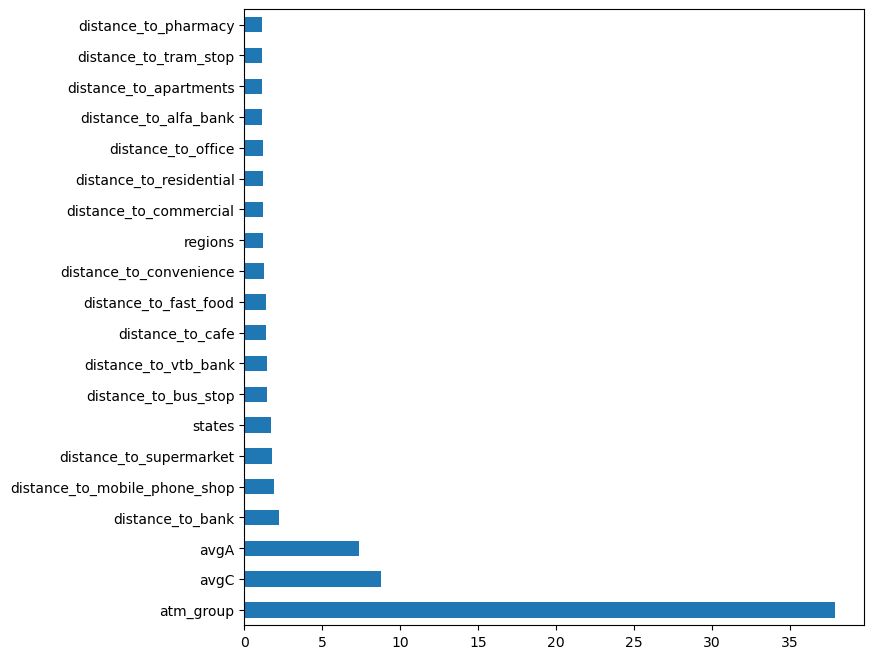

In [101]:
# оценка проводилась без StandardScaler
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
feat_importances = pd.Series(cb.feature_importances_, index=X_train.columns).nlargest(20).plot(kind='barh')

## Итог

In [102]:
metrics = pd.DataFrame({'model': ['LinearRegression', 'Ridge', 'ElasticNet', 'Tree', 
                        'Tree with GridSearchCV', 'SVR', 'Random Forest', 'Catboost'],
                        'R2':    [lr_r2_test, ridge_r2_test, en_r2_test, tree_r2_test, 
                                  gs_tree_r2_test, svr_r2_test, rf_r2_test, 
                                  cb_r2_test],
                        'MSE':   [lr_mse_test, ridge_mse_test, en_mse_test, tree_mse_test,
                                  gs_tree_mse_test, svr_mse_test, rf_mse_test, 
                                  cb_mse_test],
                        'RMSE':  [lr_rmse_test, ridge_rmse_test, en_rmse_test, tree_rmse_test,
                                  gs_tree_rmse_test, svr_rmse_test, rf_rmse_test, 
                                  cb_rmse_test],
#                         'MAPE':  [lr_mape_test, ridge_mape_test, en_mape_test, tree_mape_test,
#                                   gs_tree_mape_test, knn_mape_test, svr_mape_test, rf_mape_test, cb_mape_test]
                        })

metrics.iloc[1:, 1:] = metrics.iloc[1:, 1:].applymap(lambda x: f'{x:.6f}')
norm_metrics = metrics.iloc[1:, :]
norm_metrics

/var/folders/40/syqp3b6j0cdf65gmn816vtx40000gn/T/ipykernel_3031/1451007385.py:16: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  metrics.iloc[1:, 1:] = metrics.iloc[1:, 1:].applymap(lambda x: f'{x:.6f}')
/var/folders/40/syqp3b6j0cdf65gmn816vtx40000gn/T/ipykernel_3031/1451007385.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.729621' '0.663366' '0.548893' '0.734384' '0.579159' '0.778018'
 '0.783323']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  metrics.iloc[1:, 1:] = metrics.iloc[1:, 1:].applymap(lambda x: f'{x:.6f}')
/var/folders/40/syqp3b6j0cdf65gmn816vtx40000gn/T/ipykernel_3031/1451007385.py:16: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['0.002055' '0.002559' '0.003429' '0.002019' '0.003199' '0.001687'
 '0.001647']' has dtype incompatible with flo

,model,R2,MSE,RMSE
1,Ridge,0.729621,0.002055,0.045332
2,ElasticNet,0.663366,0.002559,0.050582
3,Tree,0.548893,0.003429,0.058554
4,Tree with GridSearchCV,0.734384,0.002019,0.044931
5,SVR,0.579159,0.003199,0.056556
6,Random Forest,0.778018,0.001687,0.041075
7,Catboost,0.783323,0.001647,0.040581


## Методы снижения размерности

In [39]:
from sklearn.feature_selection import f_classif, chi2, mutual_info_classif, SelectFromModel

In [40]:
pipe0 = Pipeline([
    ('selector_', SelectKBest(score_func=f_regression, k=100)), 
    ('model_', RandomForestRegressor())]
)

In [43]:
cv_res = cross_validate(pipe0, X_train, y_train, cv=5, scoring='r2', n_jobs=-1,
                         return_train_score=True)
cv_res

{'fit_time': array([6.65998411, 6.62683797, 6.5740869 , 6.5826571 , 6.71564889]),
 'score_time': array([0.020504  , 0.01987314, 0.0191741 , 0.01922679, 0.01830506]),
 'test_score': array([0.79552793, 0.75785618, 0.75374624, 0.7431545 , 0.76820509]),
 'train_score': array([0.9575819 , 0.95908787, 0.95960834, 0.96080023, 0.95925206])}

In [44]:
from sklearn.decomposition import PCA

pipe1 = Pipeline([
    ('selector_', PCA(n_components=110)), 
    ('model_', RandomForestRegressor(random_state=42))]
)

## Финальный pipeline модели

In [148]:
# данные предобрабатываются из БД
df = pd.read_csv('../0_data/expanded_data_with_OSM_v2.csv', sep = ';')
df_target = pd.read_csv('../0_data/train.csv', sep = ',')
df = df.merge(df_target[['id', 'target']], how='left', on='id')
df = df[df['target'].notnull()]
#замения пропуски максимальными значениями расстояний
df = df.fillna(df.max())
df = df[df['test_train_flag'] == 'train']

df['capital'] = np.where((df['cities'] == 'Moscow') | (df['cities'] == 'Saint Petersburg'), 1, 0)

df = df.merge(df.groupby('cities').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgC'}),
         how='left', on='cities')

df = df.merge(df.groupby('regions').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgR'}),
         how='left', on='regions')

df = df.merge(df.groupby('states').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgS'}),
         how='left', on='states')

df = df.merge(df.groupby('atm_group').agg({'target': 'mean'}).reset_index().rename(columns={'target': 'avgA'}),
         how='left', on='atm_group')
df['atm_group'] = df['atm_group'].astype(int)

y = df['target'].reset_index(drop=True)
X = df.loc[:, ~df.columns.isin(['target', 'Unnamed: 0','id','address','address_rus','lat','lng','test_train_flag','geometry','cnt_apart_200m','cnt_banks_200m','cnt_atm_200m'])].reset_index(drop=True)

In [157]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5957 entries, 0 to 5956
Data columns (total 50 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   atm_group                        5957 non-null   int64  
 1   distance_to_fast_food            5957 non-null   float64
 2   distance_to_clothes              5957 non-null   float64
 3   distance_to_vending_parking      5957 non-null   float64
 4   distance_to_cafe                 5957 non-null   float64
 5   distance_to_pharmacy             5957 non-null   float64
 6   distance_to_atm                  5957 non-null   float64
 7   distance_to_cinema               5957 non-null   float64
 8   distance_to_shoe_shop            5957 non-null   float64
 9   distance_to_bank                 5957 non-null   float64
 10  distance_to_supermarket          5957 non-null   float64
 11  distance_to_restaurant           5957 non-null   float64
 12  distance_to_mobile_p

In [131]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [132]:
from catboost import CatBoostRegressor

cat_features= ['regions','states','atm_group','cities']
cb  = CatBoostRegressor(cat_features= cat_features,
                           eval_metric = 'RMSE',
                           random_seed = 42)

cb.fit(X_train, y_train)
y_pred = cb.predict(X_test)

# measure quality
cb_r2_test = r2_score(y_test, y_pred)
cb_mse_test = MSE(y_test, y_pred)
cb_rmse_test = MSE(y_test, y_pred, squared=False)
# mape_test = MAPE(y_test, y_pred)

# print(f"TRAIN: R2: {r2_train}, MSE: {cb_mse_train}, \
# RMSE: {cb_rmse_train}\n")
print(f"TEST: R2: {cb_r2_test}, MSE: {cb_mse_test}, \
RMSE: {cb_rmse_test}")

Learning rate set to 0.051866
0:	learn: 0.0829638	total: 12.2ms	remaining: 12.2s
1:	learn: 0.0801379	total: 19.1ms	remaining: 9.51s
2:	learn: 0.0775902	total: 27.3ms	remaining: 9.07s
3:	learn: 0.0751669	total: 34.8ms	remaining: 8.68s
4:	learn: 0.0730128	total: 39.5ms	remaining: 7.85s
5:	learn: 0.0709605	total: 44.5ms	remaining: 7.38s
6:	learn: 0.0690615	total: 48.6ms	remaining: 6.9s
7:	learn: 0.0672098	total: 52.1ms	remaining: 6.46s
8:	learn: 0.0654161	total: 56ms	remaining: 6.17s
9:	learn: 0.0638438	total: 59.4ms	remaining: 5.88s
10:	learn: 0.0624640	total: 62.5ms	remaining: 5.62s
11:	learn: 0.0610102	total: 67.5ms	remaining: 5.56s
12:	learn: 0.0596404	total: 73.9ms	remaining: 5.61s
13:	learn: 0.0583772	total: 77.2ms	remaining: 5.44s
14:	learn: 0.0572344	total: 81.5ms	remaining: 5.35s
15:	learn: 0.0562057	total: 86.5ms	remaining: 5.32s
16:	learn: 0.0552243	total: 90.8ms	remaining: 5.25s
17:	learn: 0.0543301	total: 95.2ms	remaining: 5.19s
18:	learn: 0.0534811	total: 99.2ms	remaining: 5

In [ ]:
model.save_model('../0_data/catboost_model',
           format="cbm",
           export_parameters=None,
           pool=None)